### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
#                  alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
DF = pd.read_csv(data_url)

In [7]:
DF

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,42,42,42,42,42,42,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,98,98,98,98,98,137,137,137,138,138
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,10,10,10,11,11,11,29,29,29,29
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,17,17,17,18,38,38,38,38
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,40,40,40,40,40,40,43,45,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,2,2,2,2,2,2,2,2,2,2
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,4,4,4,4,4,4,4,5,5,5
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,9,9,9,9,9
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,8,8,8,8,8,8,8,8,8,8


In [8]:
DF = DF.groupby('Province_State').sum()
Population = DF.Population.copy()
DF = DF.drop(columns = ['Lat', 'Long_', 'UID', 'code3', 'FIPS', 'Population']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

In [9]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
#           'S.Korea': 'lightgreen', 
          'France': 'violet', 
          'Poland': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

In [10]:
Countries = list(zip(DF.columns.tolist(), DF.iloc[-1].tolist()))
Countries.sort(key=lambda t: t[1])
Countries = [c[0] for c in Countries[-12:]]
Countries

['Ohio',
 'Georgia',
 'Michigan',
 'Massachusetts',
 'Pennsylvania',
 'Illinois',
 'New Jersey',
 'Florida',
 'California',
 'Texas',
 'New York',
 'World']

In [11]:
colors = {d: c for d, c in zip(Countries, list(colors.values())[1:])}
colors

{'Ohio': 'Blue',
 'Georgia': 'Black',
 'Michigan': 'red',
 'Massachusetts': 'yellow',
 'Pennsylvania': 'grey',
 'Illinois': 'brown',
 'New Jersey': 'Purple',
 'Florida': 'violet',
 'California': 'lime',
 'Texas': 'Teal',
 'New York': 'cyan',
 'World': 'Orange'}

In [12]:
Deaths = DF.copy()
Deaths[Countries].tail(5)

Province_State,Ohio,Georgia,Michigan,Massachusetts,Pennsylvania,Illinois,New Jersey,Florida,California,Texas,New York,World
2020-12-01,6548,9515,9759,10778,10504,13131,17083,18679,19304,22114,34662,270642
2020-12-02,6671,9567,9842,10824,10676,13397,17145,18776,19410,22335,34718,273446
2020-12-03,6753,9648,10035,10874,10871,13624,17209,18874,19553,22573,34775,276325
2020-12-04,6882,9725,10117,10910,11052,13782,17255,18994,19734,22825,34830,278932
2020-12-05,6946,9793,10321,10953,11191,14016,17306,19084,19870,23055,34900,281186


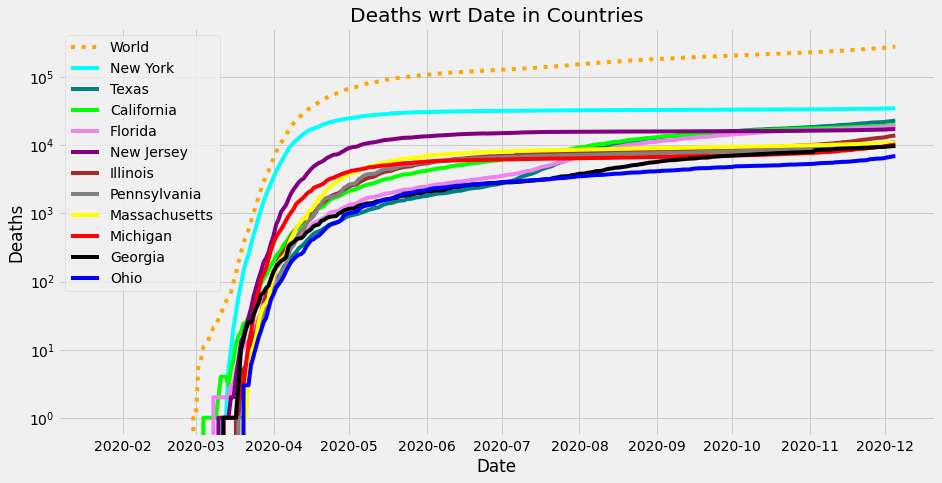

In [13]:
plotter(Deaths, 'Deaths')

In [14]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Province_State,Ohio,Georgia,Michigan,Massachusetts,Pennsylvania,Illinois,New Jersey,Florida,California,Texas,New York,World
2020-12-01,119,63,195,30,169,146,90,82,131,218,57,2597
2020-12-02,123,52,83,46,172,266,62,97,106,221,56,2804
2020-12-03,82,81,193,50,195,227,64,98,143,238,57,2879
2020-12-04,129,77,82,36,181,158,46,120,181,252,55,2607
2020-12-05,64,68,204,43,139,234,51,90,136,230,70,2254


In [15]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Province_State,Ohio,Georgia,Michigan,Massachusetts,Pennsylvania,Illinois,New Jersey,Florida,California,Texas,New York,World
2020-12-01,52.86,37.19,90.51,29.16,74.39,116.36,33.24,72.49,62.10,124.68,38.31,1479.62
2020-12-02,61.63,39.04,89.57,31.26,86.59,135.07,36.83,75.55,67.59,136.72,40.52,1645.17
2020-12-03,64.18,44.29,102.50,33.60,100.14,146.56,40.23,78.36,77.02,149.38,42.58,1799.40
2020-12-04,72.28,48.38,99.94,33.90,110.25,147.99,40.95,83.56,90.01,162.21,44.13,1900.35
2020-12-05,71.24,50.83,112.95,35.04,113.84,158.74,42.21,84.37,95.76,170.68,47.37,1944.55


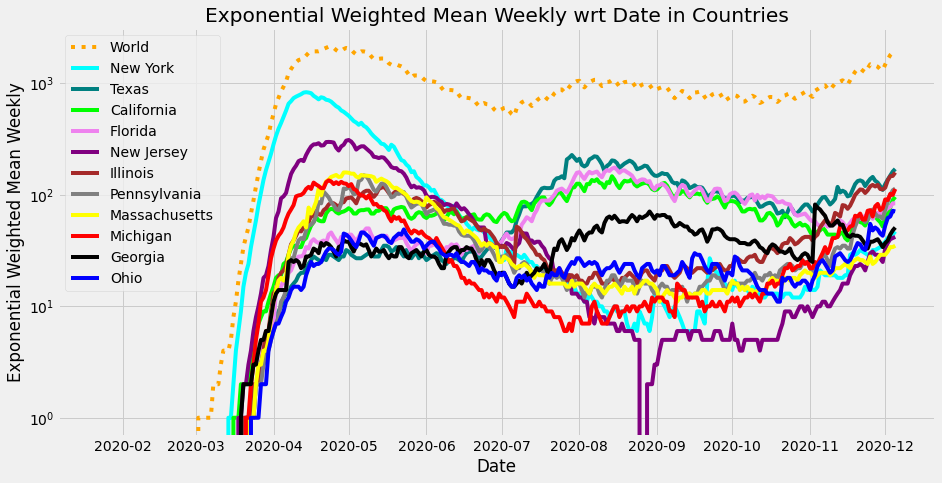

In [16]:
plotter(np.round(AVG), name)

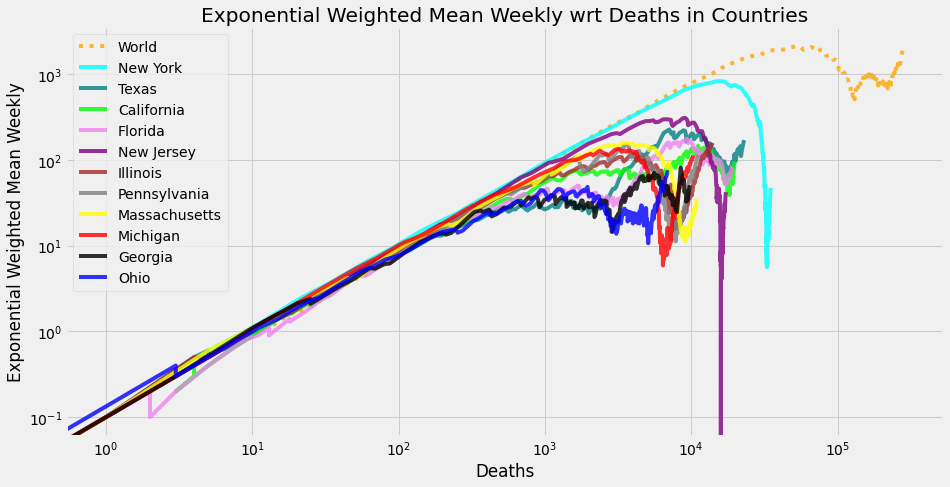

In [17]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

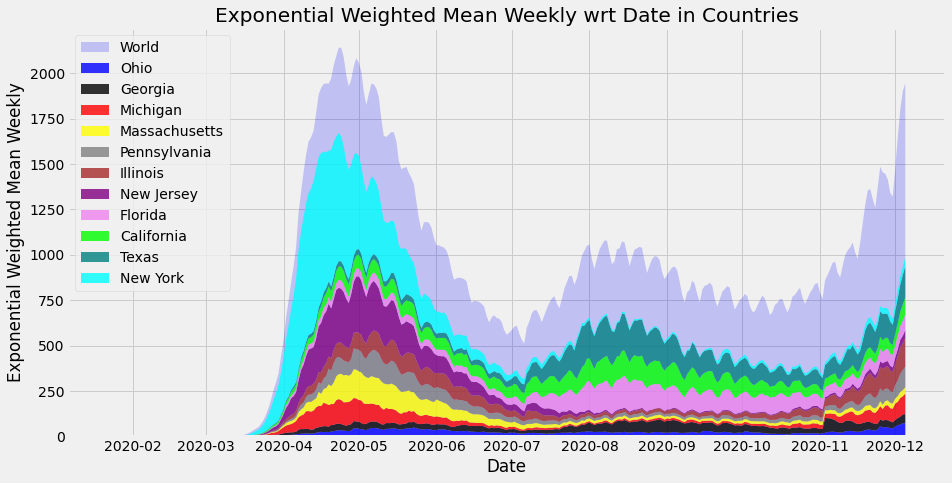

In [18]:
stackplotter(AVG, name)

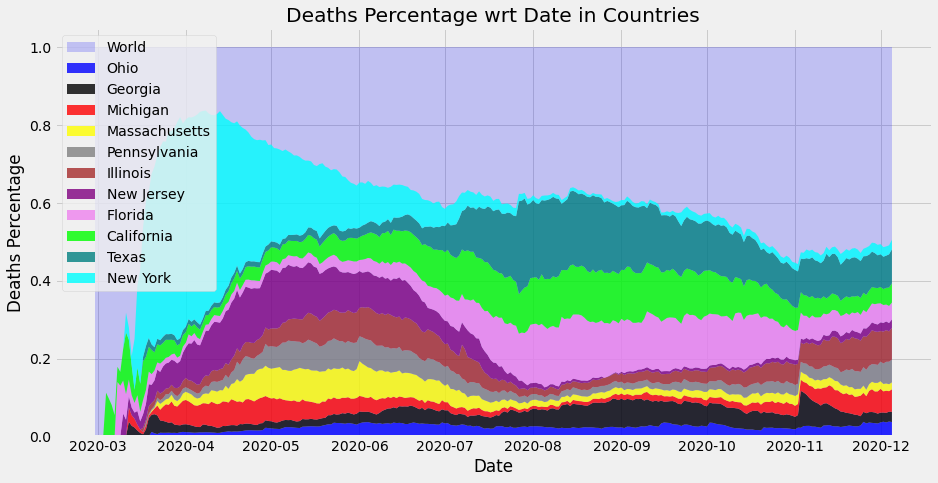

In [19]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [20]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1
Reproductivity[Countries].iloc[-1]
# plt.barh(
#     Countries,
#     Reproductivity[Countries].iloc[-1],
#     color = colors.values()
# )

Province_State
Ohio             1.9582
Georgia          1.2059
Michigan         1.6511
Massachusetts    1.3592
Pennsylvania     1.7888
Illinois         1.4143
New Jersey       1.7551
Florida          1.3725
California       1.6931
Texas            1.2623
New York         1.4752
World            1.4271
Name: 2020-12-05 00:00:00, dtype: float64

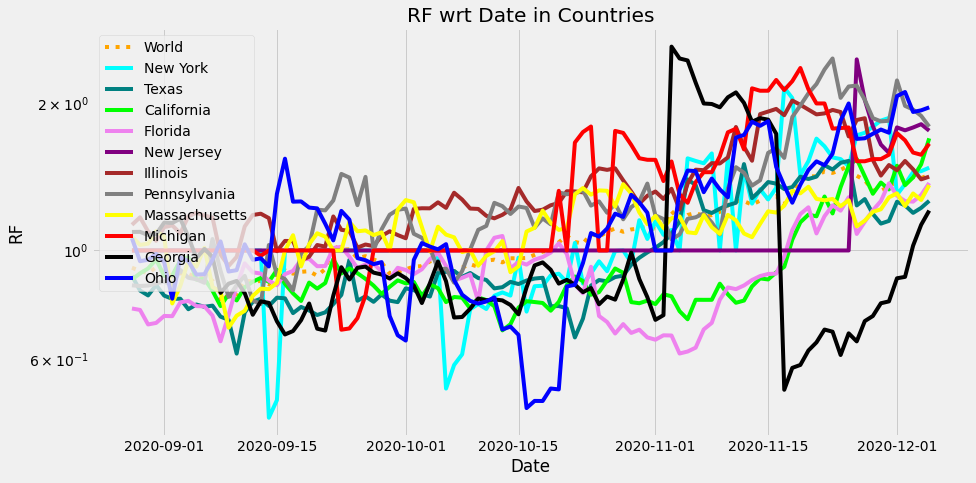

In [21]:
plotter(Reproductivity.tail(100), 'RF')

### Time Adjusted for starting day

In [22]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

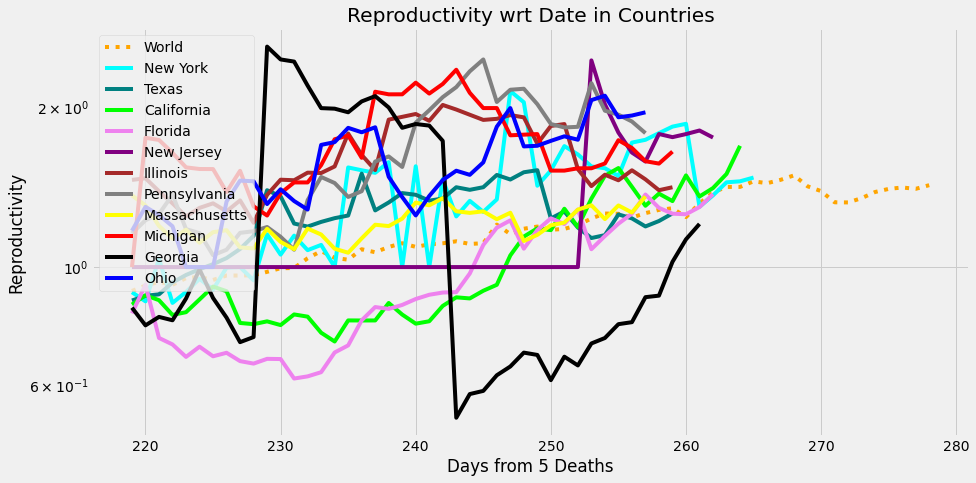

In [23]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

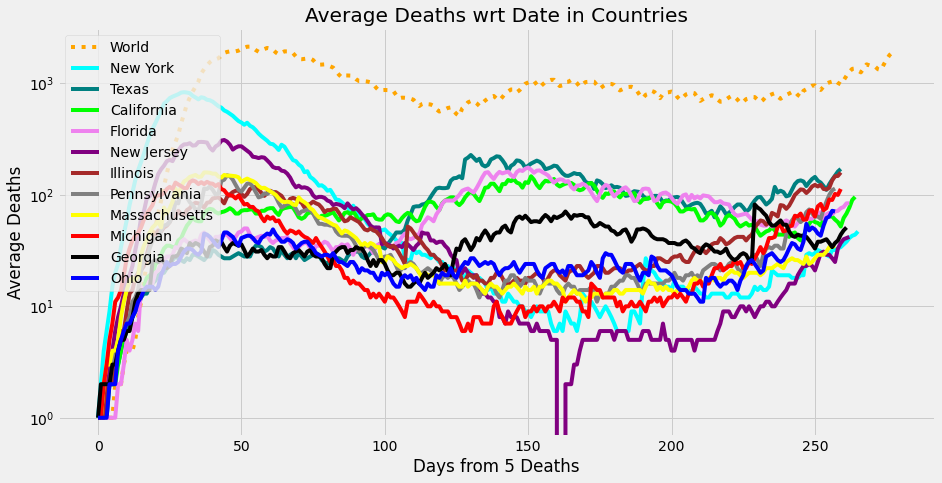

In [24]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

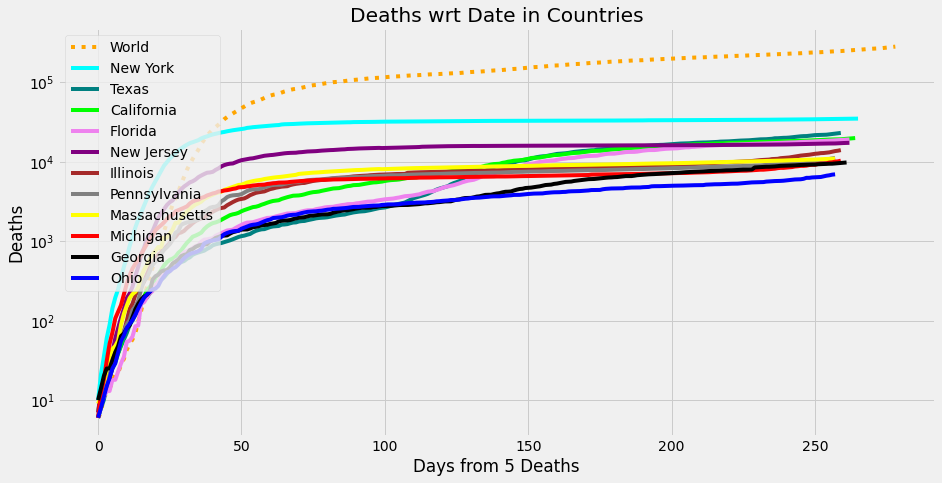

In [25]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [50]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Population'] = Population
# LastDay_DF.loc['World']['Population'] = Population.sum()
LastDay_DF['Per1000D'] = LastDay_DF.Deaths/LastDay_DF.Population*1000

In [51]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Population,Per1000D
Country,,,,,,,
World,281186,2254,2162.71,1944.55,1.4271,NaN,NaN
New York,34900,70,55.14,47.37,1.4752,19453561.0,1.794016
Texas,23055,230,181.00,170.68,1.2623,28995881.0,0.795113
California,19870,136,107.71,95.76,1.6931,39512223.0,0.502882
Florida,19084,90,91.71,84.37,1.3725,21477737.0,0.888548
New Jersey,17306,51,48.71,42.21,1.7551,8882190.0,1.948393
Illinois,14016,234,168.29,158.74,1.4143,12671821.0,1.106076
Pennsylvania,11191,139,136.71,113.84,1.7888,12801989.0,0.874161
Massachusetts,10953,43,39.57,35.04,1.3592,6892503.0,1.589118


In [52]:
LastDay_DF[LastDay_DF['Weekly_Deaths']>60].sort_values('Weekly_Deaths', ascending = False)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Population,Per1000D
Country,,,,,,,
World,281186,2254,2162.71,1944.55,1.4271,NaN,NaN
Texas,23055,230,181.00,170.68,1.2623,28995881.0,0.795113
Illinois,14016,234,168.29,158.74,1.4143,12671821.0,1.106076
Pennsylvania,11191,139,136.71,113.84,1.7888,12801989.0,0.874161
Michigan,10321,204,122.00,112.95,1.6511,9986857.0,1.033458
California,19870,136,107.71,95.76,1.6931,39512223.0,0.502882
Florida,19084,90,91.71,84.37,1.3725,21477737.0,0.888548
Ohio,6946,64,81.14,71.24,1.9582,11689100.0,0.594229
Indiana,6207,85,77.71,70.70,1.4976,6732219.0,0.921984


In [53]:
LastDay_DF.sort_values('Per1000D', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Population,Per1000D
Country,,,,,,,
Grand Princess,3,0,0.00,0.00,1.0000,0.0,inf
New Jersey,17306,51,48.71,42.21,1.7551,8882190.0,1.948393
New York,34900,70,55.14,47.37,1.4752,19453561.0,1.794016
Massachusetts,10953,43,39.57,35.04,1.3592,6892503.0,1.589118
Connecticut,5146,0,26.43,21.31,1.0000,3565287.0,1.443362
Louisiana,6548,0,22.43,20.32,1.3195,4648794.0,1.408537
Rhode Island,1413,0,9.57,7.80,1.0000,1059361.0,1.333823
North Dakota,1013,18,13.14,13.45,0.8589,762062.0,1.329288
Mississippi,3949,33,24.29,22.25,1.3485,2976149.0,1.326882


### Pie Chart

In [29]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:]
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  2162


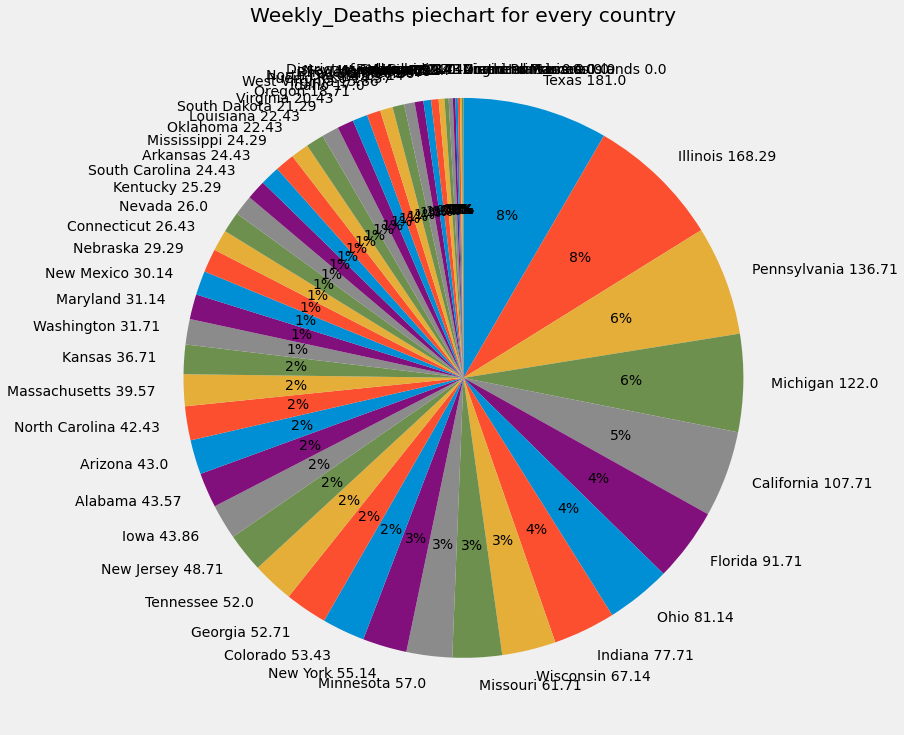

In [30]:
piechart('Weekly_Deaths')

World total:  2254


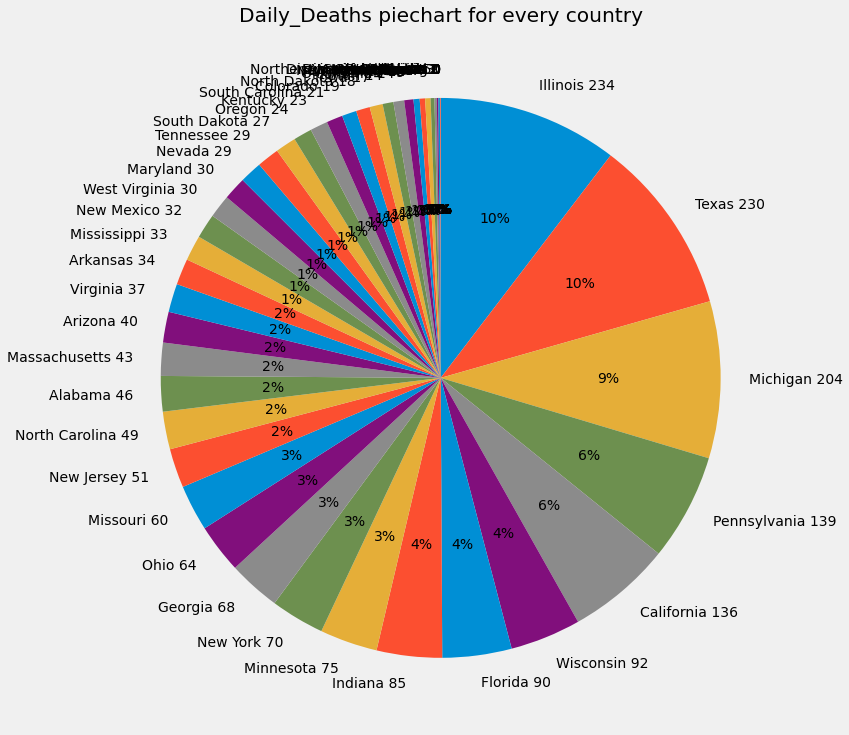

In [31]:
piechart('Daily_Deaths')

In [32]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2020-12-07


In [33]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/0.002

140593000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>